In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
data = pd.read_csv("../data/Housing.csv")

In [119]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [120]:
df = pd.DataFrame(data)

In [121]:
X = df.drop(columns=['price'])
y = df['price']

In [122]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes': 1, "no": 0})
X[varlist] = X[varlist].apply(binary_map)


In [123]:
X['furnished'] = 0
X['semi-furnished'] = 0
X['unfurnished'] = 0

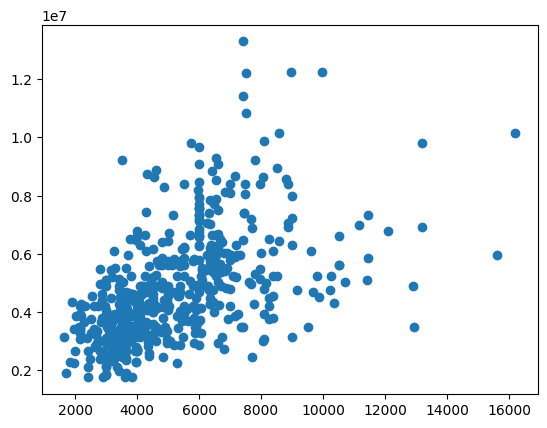

In [124]:
plt.scatter(X['area'], y)

In [125]:
def allocate_furnishing_status(row):
    status = row['furnishingstatus'] 
    if status == 'furnished':
        row['furnished'] = 1
    elif status == 'semi-furnished':
        row['semi-furnished'] = 1
    elif status == 'unfurnished':
        row['unfurnished'] = 1
    return row
X = X.apply(allocate_furnishing_status, axis=1)

X=X.drop(columns=['furnishingstatus'])

In [126]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


In [127]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

<Axes: >

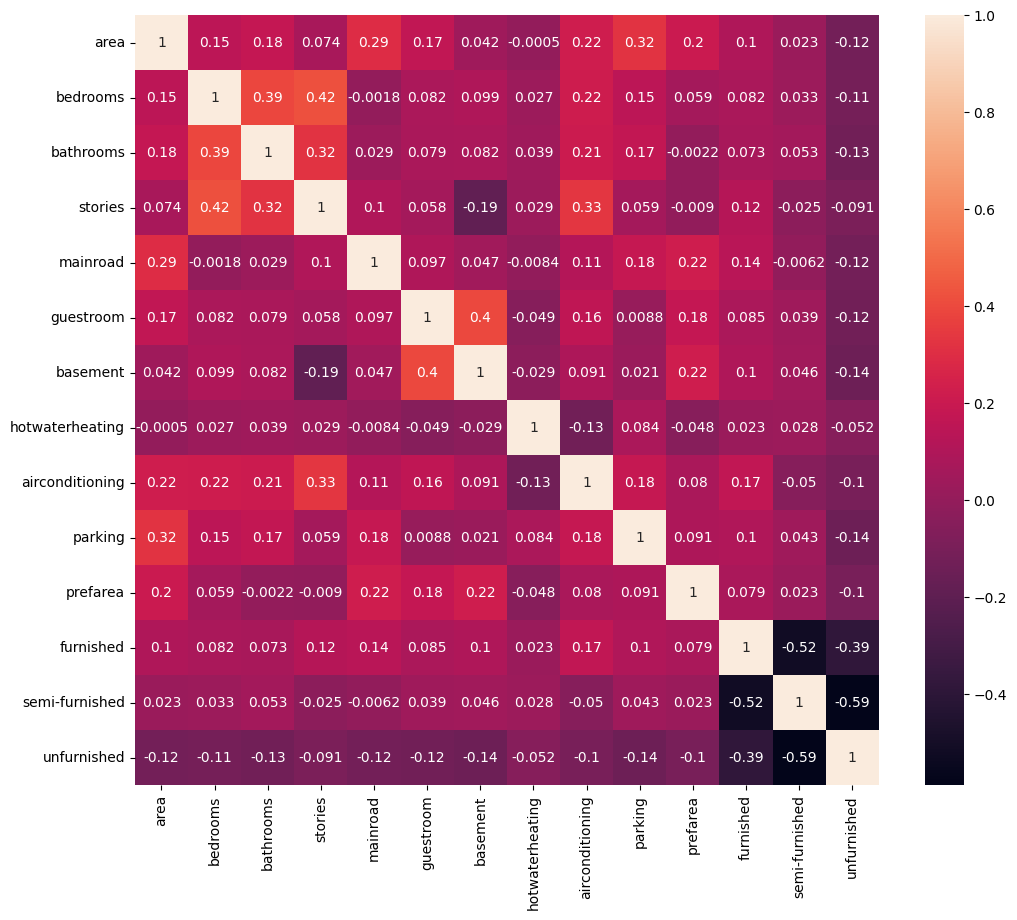

In [128]:
plt.figure(figsize=(12, 10))
corr = X_train.corr()
sns.heatmap(corr, annot=True)

In [129]:
## Feature scalling or standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Text(0.5, 1.0, 'X_train After Scaling')

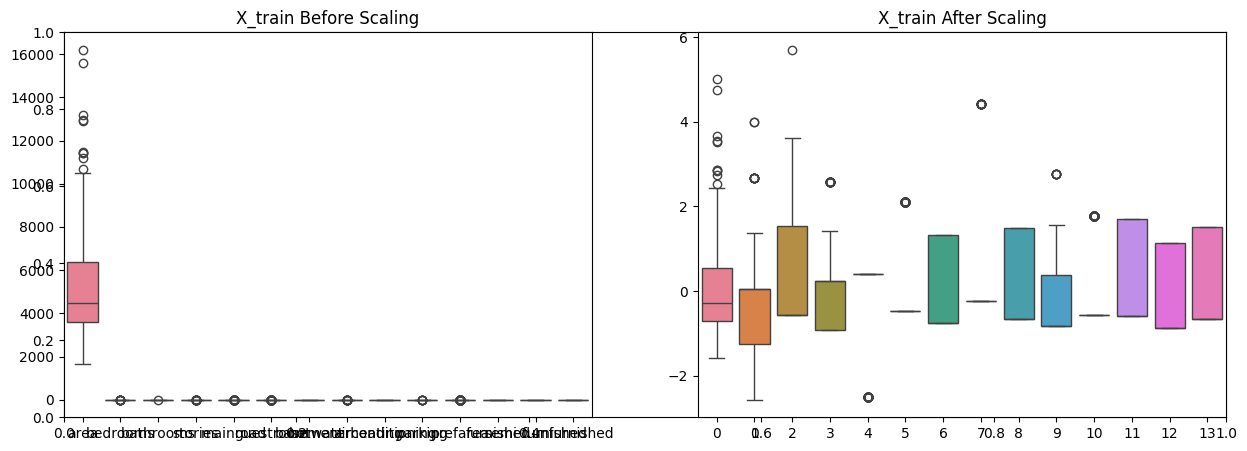

In [130]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')


In [131]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

LinearRegression()

Mean absolute error: 91595588.64463975%
R2 score: 38.344161151102654  %


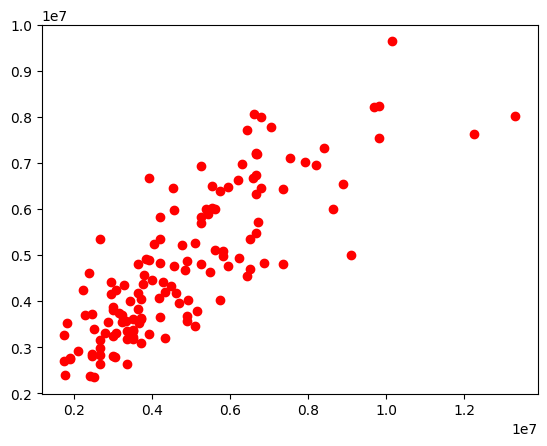

In [132]:
from sklearn.metrics import mean_absolute_error, r2_score
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_pred, y_test)
print(f"Mean absolute error: {mae*100}%")
print(f"R2 score: {score*100}  %")
# plt.scatter(x=X_test, y=y_pred, color='red')
plt.scatter(y_test, y_pred, color='red')

In [133]:
from sklearn.linear_model import ElasticNet
enetreg = ElasticNet()
enetreg.fit(X_train_scaled, y_train)

ElasticNet()

Mean absolute error: 93745263.01105155%
R2 score: -6.101103886525894  %


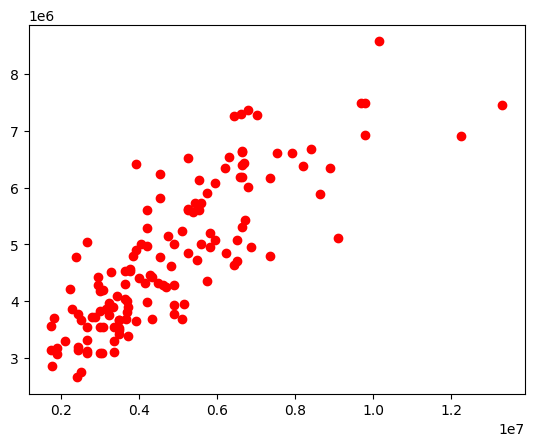

In [134]:
from sklearn.metrics import mean_absolute_error, r2_score
y_pred = enetreg.predict(X_test_scaled)
mae_enet = mean_absolute_error(y_test, y_pred)
score_enet = r2_score(y_pred, y_test)
print(f"Mean absolute error: {mae_enet*100}%")
print(f"R2 score: {score_enet*100}  %")
plt.scatter(y_test, y_pred, color='red')

In [135]:
from sklearn.linear_model import Ridge
ridreg = Ridge()
ridreg.fit(X_train_scaled, y_train)


Ridge()

Mean absolute error: 91573714.46037981
R2 score: 38.168940951048036  


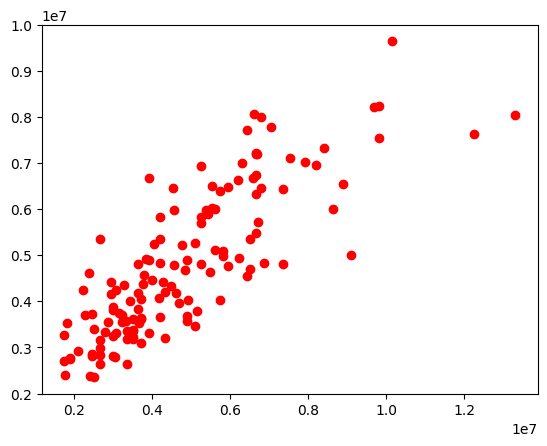

In [136]:
from sklearn.metrics import mean_absolute_error, r2_score
y_pred = ridreg.predict(X_test_scaled)
mae_enet = mean_absolute_error(y_test, y_pred)
score_enet = r2_score(y_pred, y_test)
print(f"Mean absolute error: {mae_enet*100}")
print(f"R2 score: {score_enet*100}  ")
plt.scatter(y_test, y_pred, color='red')

In [137]:
from sklearn.linear_model import LassoCV
lassocvreg = LassoCV(cv=5)
lassocvreg.fit(X_train_scaled, y_train)


LassoCV(cv=5)

Mean absolute error: 91596064.07236218
R2 score: 38.14042658031437  


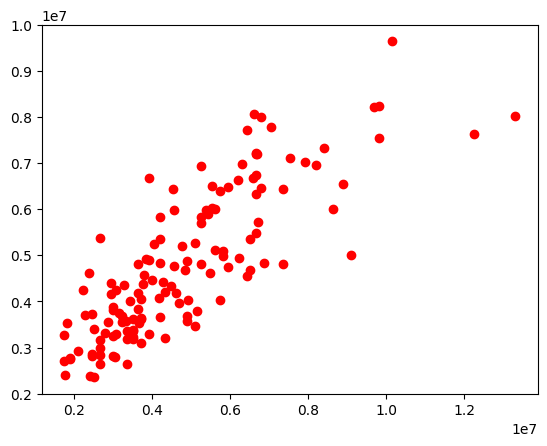

In [138]:
from sklearn.metrics import mean_absolute_error, r2_score
y_pred = lassocvreg.predict(X_test_scaled)
mae_enet = mean_absolute_error(y_test, y_pred)
score_enet = r2_score(y_pred, y_test)
print(f"Mean absolute error: {mae_enet*100}")
print(f"R2 score: {score_enet*100}  ")
plt.scatter(y_test, y_pred, color='red')

In [139]:
from sklearn.linear_model import RidgeCV
ridgeCv = RidgeCV(cv=10)
ridgeCv.fit(X_train_scaled, y_train)

RidgeCV(cv=10)

Mean absolute error: 91392890.5640563
R2 score: 36.57131074283626  


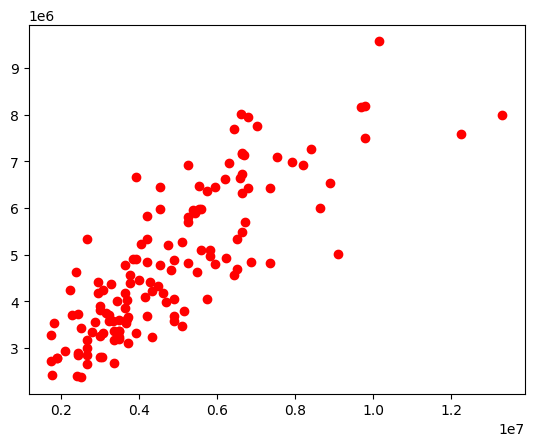

In [140]:
from sklearn.metrics import mean_absolute_error, r2_score
y_pred = ridgeCv.predict(X_test_scaled)
mae_enet = mean_absolute_error(y_test, y_pred)
score_enet = r2_score(y_pred, y_test)
print(f"Mean absolute error: {mae_enet*100}")
print(f"R2 score: {score_enet*100}  ")
plt.scatter(y_test, y_pred, color='red')

In [141]:
import pickle as pkl
pkl.dump(scaler, open('scaler.pkl', 'wb'))
pkl.dump(linreg, open('linreg.pkl', 'wb'))